# LAB 3 - REGRESION LOGISTICA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerias necesarias

In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1. Preparamos los datos



Cargamos el dataset

In [3]:
# Cargar datos
file_path = '/content/drive/MyDrive/Universidad/2-2024/sis420/Datasets/bankloan.csv'
# Cargar el archivo CSV usando pandas
data = pd.read_csv(file_path)
data

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Preparamos el DATASET       

In [4]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

DATOS VACIOS
ID           

Descartaremos columnas que no son necesarias para el analisis o que tienen muchos datos perdidos

In [5]:
data.drop(['ID'], axis=1, inplace=True)
data.drop(['ZIP.Code'], axis=1, inplace=True)

In [6]:
#Imprimimos los datos para ver que se hayan eliminado las columnas
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


Verificamos que no haya datos vacios

In [7]:
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


Dividimos el data set: **20 %** para pruebas y **80 %** para entrenamiento

In [8]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, [0,1,2,3,4,5,6,8,9,10,11]]  # Seleccionamos los datos para la Xtest
y_test = test_data.iloc[:, 7]   # Seleccionamos los datos para la ytest

# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, [0,1,2,3,4,5,6,8,9,10,11]]
y_train = train_data.iloc[:, 7]

m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el test son: {:.0f}".format(len(test_data)))


Datos de X_train:
      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
4227   32           7     111       1    3.8          1         0   
4676   39          13      68       3    2.1          1         0   
800    31           7     173       1    6.0          1         0   
3671   50          25      18       1    0.4          3         0   
4193   62          37      31       3    0.2          1         0   
...   ...         ...     ...     ...    ...        ...       ...   
4426   33           8     140       1    4.6          1         0   
466    25           0      13       2    0.9          3         0   
3092   43          18     113       2    0.4          1       325   
3772   35          10     152       2    3.0          1         0   
860    57          31      30       2    0.7          2       145   

      Securities.Account  CD.Account  Online  CreditCard  
4227                   1           0       0           0  
4676                   1           

# 2. Implementacion de la regresión logística

Se llama a la función implementada para mostrar los datos cargados:

Conjunto de datos con todos los partidos de la NBA desde la temporada 2004 hasta diciembre 2020 En esta parte del ejercicio, creará un modelo de regresión logística para predecir los partidos del Equipo de NBA si todos sus partidos de local fueron ganadas(Si) o fue derrotas(No).

Para los partidos jugados de local se necesita registros que seran evaluados en el transcurso del proceso.

Los datos que se conocen son: FG_PCT_home, FT_PCT_home, FG3_PCT_home, AST_home, REB_home, TEAM_ID_away, PTS_away, FG_PCT_away, FT_PCT_away, FG3_PCT_away, AST_away, REB_away, HOME_TEAM_WINS.

El modelo que debemos aplicar es Regresión logistica donde calcularemos la probabilidad si el equipo del BNA ganó partidos de local (Si/No).

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [9]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos los Datos

In [10]:
X_norm, mu, sigma = featureNormalize(X_train)

Mostramos los datos normalizados

In [11]:
X_norm

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
4227,-1.158067,-1.136388,0.805872,-1.206542,1.068332,-1.048362,-0.552351,2.892695,-0.252646,-1.222833,-0.646092
4676,-0.546673,-0.612697,-0.128441,0.539855,0.096520,-1.048362,-0.552351,2.892695,-0.252646,0.817773,-0.646092
800,-1.245409,-1.136388,2.153022,-1.206542,2.325971,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
3671,0.414088,0.434686,-1.214852,-1.206542,-0.875293,1.334279,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
4193,1.462191,1.482068,-0.932385,0.539855,-0.989624,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
...,...,...,...,...,...,...,...,...,...,...,...
4426,-1.070725,-1.049106,1.435991,-1.206542,1.525655,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
466,-1.769460,-1.747361,-1.323493,-0.333344,-0.589466,1.334279,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
3092,-0.197305,-0.176288,0.849329,-0.333344,-0.875293,-1.048362,2.586761,2.892695,-0.252646,-1.222833,-0.646092
3772,-0.896041,-0.874543,1.696729,-0.333344,0.611008,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092


In [12]:
# Obtener las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 4000
n (número de columnas): 11


Agregamos una columna de unos

In [13]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
X_ready

array([[ 1.        , -1.15806671, -1.13638829, ..., -0.25264558,
        -1.2228333 , -0.64609167],
       [ 1.        , -0.54667317, -0.612697  , ..., -0.25264558,
         0.81777296, -0.64609167],
       [ 1.        , -1.24540864, -1.13638829, ..., -0.25264558,
         0.81777296, -0.64609167],
       ...,
       [ 1.        , -0.19730543, -0.17628758, ..., -0.25264558,
        -1.2228333 , -0.64609167],
       [ 1.        , -0.89604091, -0.87454265, ..., -0.25264558,
         0.81777296, -0.64609167],
       [ 1.        ,  1.02548165,  0.95837689, ..., -0.25264558,
        -1.2228333 , -0.64609167]])

    Definimos la función Sigmoidea

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [15]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de `z`.

In [16]:
# Prueba la implementacion de la funcion sigmoid
print(sigmoid(0))

0.5


In [17]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


    Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [18]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [19]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [20]:
import matplotlib.pyplot as plt

In [21]:
print(X_ready.shape)
print(y_train.shape)

(4000, 12)
(4000,)


theta calculado por el descenso por el gradiente: [-2.64994475  0.0237732   0.03280169  1.04123724  0.34163873  0.27762613
  0.56827267  0.09396068 -0.1157742   0.49743357 -0.1031762  -0.20044423]


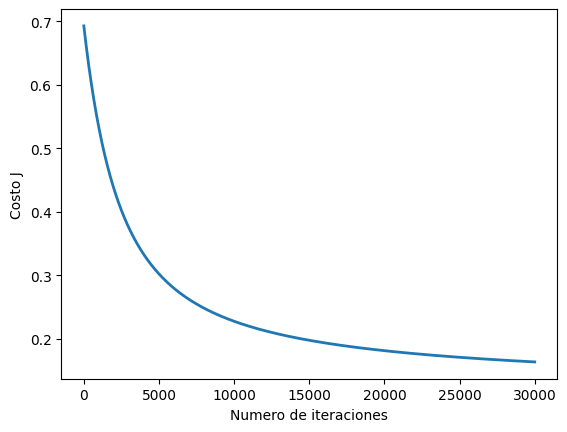

In [22]:
import matplotlib.pyplot as plt

#Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 30000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2) # Usa plt.plot en lugar de pyplot.plot
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [23]:
print(f"Con un costo de: { J_history[-1]} ")

Con un costo de: 0.16379159749794775 


Ahora realizamos unas pruebas para ver si una persona con ciertos datos tiene o no un prestamo

In [24]:
X_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
1501,30,4,35,2,0.3,2,0,1,0,0,1
2586,47,23,149,4,6.1,1,0,0,0,0,1
2653,30,5,121,2,3.1,1,408,0,0,1,0
1055,31,6,62,1,1.0,1,0,1,0,1,0
705,62,36,30,3,0.7,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4711,65,40,59,3,2.4,1,0,0,0,0,0
2313,58,32,54,3,0.3,2,0,0,0,1,1
3214,61,37,33,3,0.1,3,0,0,0,1,0
2732,33,9,38,1,2.1,3,133,0,0,0,0


In [25]:
# Realizando algunas pruebas

X_array = [1, 25,	1,	49,	4,	1.6,	1,	0,	1,	0,	0,	0]
resuldato = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"El equipo de la NBA con las siguientes datos: {X_array}")
print('El equipo tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resuldato))

El equipo de la NBA con las siguientes datos: [1, 25, 1, 49, 4, 1.6, 1, 0, 1, 0, 0, 0]
El equipo tiene como probabilidad de ganar el partido de local: 1


In [26]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array = [1, 34,9,180,1,8.9,3,0,0,0,0,0]
resuldato = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"El equipo de la NBA con las siguientes datos: {X_array}")
print('El equipo tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resuldato))

El equipo de la NBA con las siguientes datos: [1, 34, 9, 180, 1, 8.9, 3, 0, 0, 0, 0, 0]
El equipo tiene como probabilidad de ganar el partido de local: 1


# 3. TEST de validación

Haremos las pruebas del rendimiento del modelo con el 20% de los datos

In [27]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
1501,-1.332751,-1.398234,-0.845472,-0.333344,-0.932458,0.142958,-0.552351,2.892695,-0.252646,-1.222833,1.547768
2586,0.152062,0.260122,1.631545,1.413054,2.383136,-1.048362,-0.552351,-0.345698,-0.252646,-1.222833,1.547768
2653,-1.332751,-1.310952,1.023155,-0.333344,0.668174,-1.048362,3.388441,-0.345698,-0.252646,0.817773,-0.646092
1055,-1.245409,-1.223670,-0.258810,-1.206542,-0.532300,-1.048362,-0.552351,2.892695,-0.252646,0.817773,-0.646092
705,1.462191,1.394786,-0.954113,0.539855,-0.703796,0.142958,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
...,...,...,...,...,...,...,...,...,...,...,...
4711,1.724217,1.743914,-0.323995,0.539855,0.268016,-1.048362,-0.552351,-0.345698,-0.252646,-1.222833,-0.646092
2313,1.112824,1.045659,-0.432636,0.539855,-0.932458,0.142958,-0.552351,-0.345698,-0.252646,0.817773,1.547768
3214,1.374849,1.482068,-0.888928,0.539855,-1.046789,1.334279,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
2732,-1.070725,-0.961825,-0.780287,-1.206542,0.096520,1.334279,0.732270,-0.345698,-0.252646,-1.222833,-0.646092


Concatenamos con una columna de unos a la izquierda

In [28]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.         -1.33275058 -1.39823394 ... -0.25264558 -1.2228333
   1.54776799]
 [ 1.          0.15206231  0.26012183 ... -0.25264558 -1.2228333
   1.54776799]
 [ 1.         -1.33275058 -1.31095206 ... -0.25264558  0.81777296
  -0.64609167]
 ...
 [ 1.          1.37484939  1.48206819 ... -0.25264558  0.81777296
  -0.64609167]
 [ 1.         -1.07072478 -0.96182453 ... -0.25264558 -1.2228333
  -0.64609167]
 [ 1.         -1.33275058 -1.22367018 ... -0.25264558  0.81777296
  -0.64609167]]


In [29]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [30]:
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha*100, columns = ['Probabilidad de victoria %'])
df_pred['Probabilidad de victoria %'] = df_pred['Probabilidad de victoria %'].abs()

In [31]:
pd.set_option('display.max_columns', None)

In [35]:
X_columans = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Valores del Y Reales'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(100)

,Valores del Y Reales,Probabilidad de victoria %,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,0,0.999233,30.0,4.0,35.0,2.0,0.3,2.0,0.0,1.0,0.0,0.0,1.0
1,1,32.916200,47.0,23.0,149.0,4.0,6.1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,12.948048,30.0,5.0,121.0,2.0,3.1,1.0,408.0,0.0,0.0,1.0,0.0
3,0,0.983179,31.0,6.0,62.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,2.698737,62.0,36.0,30.0,3.0,0.7,2.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,23.312355,56.0,30.0,178.0,1.0,2.9,1.0,0.0,0.0,0.0,1.0,0.0
96,0,3.212840,27.0,3.0,43.0,3.0,0.1,2.0,163.0,0.0,0.0,1.0,0.0
97,1,37.859181,46.0,22.0,125.0,2.0,4.7,3.0,0.0,0.0,0.0,1.0,0.0
98,0,1.056247,49.0,25.0,20.0,4.0,1.0,1.0,111.0,0.0,0.0,1.0,1.0


## Presición de nuestro modelo de regresion logaritmica

Usamos el metodo np.mean, la media (promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [39]:
# Usando el umbral donde todo valor que sea >= 0.5 será 1 o al contrario es 0
y_umbral = (y_predicha[0] >= 0.5).astype(int)

# Mostramos la precisión de entrenamiento
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 89.50 % 
